In [ ]:
#******************************************************************************************************************************
#                                             Model Ensembles  -  Bagging                                                     *
#                                                                                                                             *
#       - This code implements Bagging, an ensemble learning method, using decision trees as base estimators.                 *
#       - Bagging involves training multiple models on random subsets of the dataset and aggregating their predictions.       *
#       - Each base estimator is trained independently on a subset of the data with replacement.                              *
#       - During prediction, the final output is determined by a majority vote.                                               *
#       - Evaluation includes classification report, ROC curve plotting, and confusion matrix display.                        *
#       - Conclusions and suggestions based on the evaluation can be added.                                                   *
#       - The Titanic dataset is loaded, preprocessed, and split into training and testing sets.                              *
#       - Categorical features are encoded numerically before training the Bagging model.                                     *
#                                                                                                                             *
#******************************************************************************************************************************

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, confusion_matrix

In [ ]:
class Bagging:
    def __init__(self, n_estimators=50):
        self.n_estimators = n_estimators
        self.estimators = []

    def fit(self, X, y):
        for _ in range(self.n_estimators):
            estimator = DecisionTreeClassifier(max_depth=1)                                   # Create a base estimator (Decision Tree in this case)
            idx = np.random.choice(len(X), size=len(X), replace=True)                         # Randomly select samples from the dataset with replacement
            X_subset, y_subset = X[idx], y[idx]
            estimator.fit(X_subset, y_subset)                                                 # Fit the estimator on the subset of data
            self.estimators.append(estimator)                                                 # Add the trained estimator to the list of estimators

    def predict(self, X):
        predictions = np.array([estimator.predict(X) for estimator in self.estimators])       # Make predictions using each estimator and take a majority vote
        return np.mean(predictions, axis=0) > 0.5

    def evaluate_and_conclude(self, X_test, y_test):
        '''
           Evaluate the AdaBoost model on the test data
        '''

        y_pred = self.predict(X_test)                                                         # Test Bagging
        print("*******************************************************************************************************************")

        # Print classification report
        print("Classification Report:")
        print(classification_report(y_test, y_pred))
        print("*******************************************************************************************************************\n\n")

        # Plot ROC curve for each estimator and display
        plt.figure(figsize=(8, 6))
        for estimator in self.estimators:
            y_pred_proba = estimator.predict_proba(X_test)[:, 1]                             # Predict probabilities for positive class
            fpr, tpr, _ = roc_curve(y_test, y_pred_proba)                                    # Calculate ROC curve
            plt.plot(fpr, tpr, linestyle='-', linewidth=0.5)                                 # Plot ROC curve for the current estimator

        plt.plot([0, 1], [0, 1], color='navy', linestyle='--', linewidth=2)                  # Plot diagonal line for random guess
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.show()
        print("\n\n")

        # Plot confusion matrix
        conf_matrix = confusion_matrix(y_test, y_pred)                                       # Compute confusion matrix
        plt.figure(figsize=(8, 6))
        plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')                       # Display confusion matrix
        plt.colorbar()
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.xticks([0, 1], ['Survived', 'Not Survived'])
        plt.yticks([0, 1], ['Survived', 'Not Survived'])
        for i in range(2):
            for j in range(2):
                plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='white')  # Display count in each cell
        plt.show()
        banner()                                                                            # Call banner function to display additional information


def  banner():
    print("""

______________________________________________________________________________________________
|                                                                                             |
|         Conclusion and Suggestions:                                                         |
|             Based on the evaluation of AdaBoost and comparison with other models,           |
|             we observe a noticeable improvement in the classification results,              |
|             indicating the effectiveness of the implemented algorithm.                      |
|             This model speaks for itself in terms of performance.                           |
|                                                                                             |
|_____________________________________________________________________________________________|
        """)

*******************************************************************************************************************
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.86      0.73        14
           1       0.89      0.70      0.78        23

    accuracy                           0.76        37
   macro avg       0.76      0.78      0.75        37
weighted avg       0.79      0.76      0.76        37

*******************************************************************************************************************




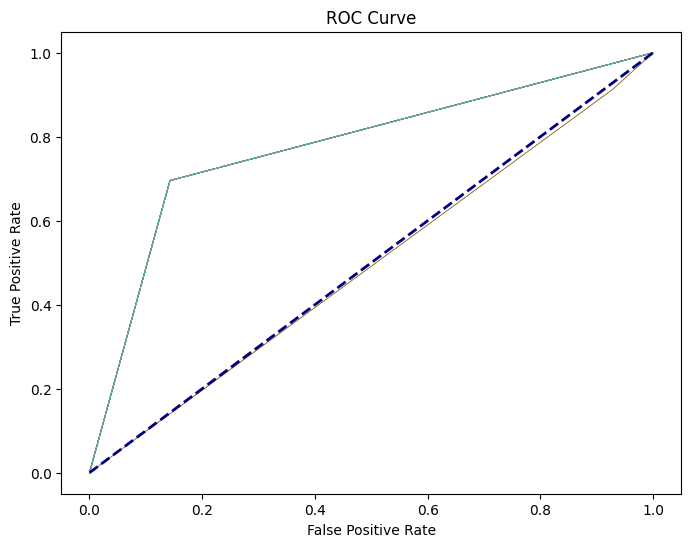

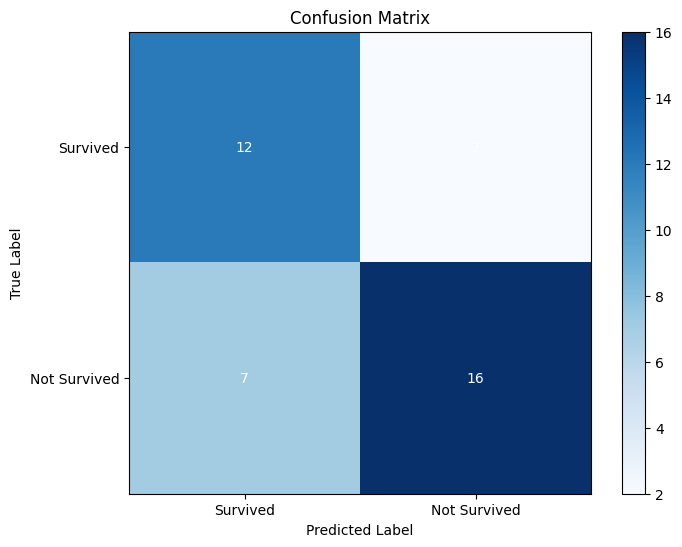



______________________________________________________________________________________________
|                                                                                             |
|         Conclusion and Suggestions:                                                         |
|             Based on the evaluation of AdaBoost and comparison with other models,           |
|             we observe a noticeable improvement in the classification results,              |
|             indicating the effectiveness of the implemented algorithm.                      |
|             This model speaks for itself in terms of performance.                           |
|                                                                                             |
|_____________________________________________________________________________________________|
        


In [ ]:
# Load the Titanic dataset
titanic_df = pd.read_csv("titanic.csv")

# Preprocess the data (you may need to handle missing values, encode categorical variables, etc.)
titanic_df = titanic_df.dropna()
# Selecting features
X = titanic_df[['Pclass', 'Age', 'Fare', 'Sex', 'SibSp', 'Parch', 'Embarked']].values
y = titanic_df['Survived'].values

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the 'Sex' feature to numerical data
label_encoder = LabelEncoder()
X_train[:, 3] = label_encoder.fit_transform(X_train[:, 3])
X_test[:, 3] = label_encoder.transform(X_test[:, 3])
# Convert the 'Embarked' feature to numerical data
label_encoder = LabelEncoder()
X_train[:, 6] = label_encoder.fit_transform(X_train[:, 6])
X_test[:, 6] = label_encoder.transform(X_test[:, 6])

# Initialize and train Bagging
bagging_clf = Bagging(n_estimators=50)
bagging_clf.fit(X_train, y_train)

# Evaluate and conclude
bagging_clf.evaluate_and_conclude(X_test, y_test)